In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
data = pd.read_csv('rotten_tomatoes_movies.csv', usecols=['content_rating','tomatometer_status','tomatometer_count', 'audience_status','audience_count'])

In [38]:
data

content_rating tomatometer_status  tomatometer_count audience_status  \
0                 PG             Rotten              149.0         Spilled   
1                  R    Certified-Fresh              142.0         Upright   
2                  R              Fresh               24.0         Spilled   
3                 NR    Certified-Fresh               54.0         Upright   
4                  G              Fresh               27.0         Upright   
...              ...                ...                ...             ...   
17707              R             Rotten                9.0         Upright   
17708             PG    Certified-Fresh              291.0         Upright   
17709             NR              Fresh               10.0         Upright   
17710             PG              Fresh               23.0         Upright   
17711             PG             Rotten                8.0         Upright   

       audience_count  
0            254421.0  
1             11574.0  
2             14684.0  
3            105386.0  
4             68918.0  
...               ...  
17707          1195.0  
17708        101511.0  
17709          7146.0  
17710         30193.0  
17711          4469.0  

[17712 rows x 5 columns]

In [39]:
data = data.dropna()

In [40]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [41]:
type(data)

pandas.core.frame.DataFrame

In [42]:
X = data.drop('tomatometer_status', axis=1)
y = data['tomatometer_status']

In [43]:
X

content_rating  tomatometer_count audience_status  audience_count
0                 PG              149.0         Spilled        254421.0
1                  R              142.0         Upright         11574.0
2                  R               24.0         Spilled         14684.0
3                 NR               54.0         Upright        105386.0
4                  G               27.0         Upright         68918.0
...              ...                ...             ...             ...
17707              R                9.0         Upright          1195.0
17708             PG              291.0         Upright        101511.0
17709             NR               10.0         Upright          7146.0
17710             PG               23.0         Upright         30193.0
17711             PG                8.0         Upright          4469.0

[17254 rows x 4 columns]

In [44]:
y

0                 Rotten
1        Certified-Fresh
2                  Fresh
3        Certified-Fresh
4                  Fresh
              ...       
17707             Rotten
17708    Certified-Fresh
17709              Fresh
17710              Fresh
17711             Rotten
Name: tomatometer_status, Length: 17254, dtype: object

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [46]:
df_dummies = pd.get_dummies(X[['content_rating', 'audience_status']])
df_dummies

content_rating_G  content_rating_NC17  content_rating_NR  \
0                     0                    0                  0   
1                     0                    0                  0   
2                     0                    0                  0   
3                     0                    0                  1   
4                     1                    0                  0   
...                 ...                  ...                ...   
17707                 0                    0                  0   
17708                 0                    0                  0   
17709                 0                    0                  1   
17710                 0                    0                  0   
17711                 0                    0                  0   

       content_rating_PG  content_rating_PG-13  content_rating_R  \
0                      1                     0                 0   
1                      0                     0                 1   
2                      0                     0                 1   
3                      0                     0                 0   
4                      0                     0                 0   
...                  ...                   ...               ...   
17707                  0                     0                 1   
17708                  1                     0                 0   
17709                  0                     0                 0   
17710                  1                     0                 0   
17711                  1                     0                 0   

       audience_status_Spilled  audience_status_Upright  
0                            1                        0  
1                            0                        1  
2                            1                        0  
3                            0                        1  
4                            0                        1  
...                        ...                      ...  
17707                        0                        1  
17708                        0                        1  
17709                        0                        1  
17710                        0                        1  
17711                        0                        1  

[17254 rows x 8 columns]

In [47]:
X = X.drop(['content_rating','audience_status'], axis=1)
X = pd.concat([X, df_dummies], axis=1)

In [48]:
X

tomatometer_count  audience_count  content_rating_G  \
0                  149.0        254421.0                 0   
1                  142.0         11574.0                 0   
2                   24.0         14684.0                 0   
3                   54.0        105386.0                 0   
4                   27.0         68918.0                 1   
...                  ...             ...               ...   
17707                9.0          1195.0                 0   
17708              291.0        101511.0                 0   
17709               10.0          7146.0                 0   
17710               23.0         30193.0                 0   
17711                8.0          4469.0                 0   

       content_rating_NC17  content_rating_NR  content_rating_PG  \
0                        0                  0                  1   
1                        0                  0                  0   
2                        0                  0                  0   
3                        0                  1                  0   
4                        0                  0                  0   
...                    ...                ...                ...   
17707                    0                  0                  0   
17708                    0                  0                  1   
17709                    0                  1                  0   
17710                    0                  0                  1   
17711                    0                  0                  1   

       content_rating_PG-13  content_rating_R  audience_status_Spilled  \
0                         0                 0                        1   
1                         0                 1                        0   
2                         0                 1                        1   
3                         0                 0                        0   
4                         0                 0                        0   
...                     ...               ...                      ...   
17707                     0                 1                        0   
17708                     0                 0                        0   
17709                     0                 0                        0   
17710                     0                 0                        0   
17711                     0                 0                        0   

       audience_status_Upright  
0                            0  
1                            1  
2                            0  
3                            1  
4                            1  
...                        ...  
17707                        1  
17708                        1  
17709                        1  
17710                        1  
17711                        1  

[17254 rows x 10 columns]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_clf.predict(X_test)

array(['Rotten', 'Fresh', 'Certified-Fresh', ..., 'Rotten', 'Fresh',
       'Rotten'], dtype=object)

In [52]:
dt_clf.score(X_test,y_test), dt_clf.score(X_train,y_train)

(0.6322804984062591, 0.9965949431283054)

[Text(0.5453059087604704, 0.9864864864864865, 'audience_status_Upright <= 0.5\nsamples = 13803\nvalue = [2566, 5265, 5972]\nclass = Fresh'),
 Text(0.3172031101129303, 0.9594594594594594, 'content_rating_NR <= 0.5\nsamples = 6318\nvalue = [292, 1558, 4468]\nclass = Fresh'),
 Text(0.21670819519484466, 0.9324324324324325, 'audience_count <= 17252.5\nsamples = 4729\nvalue = [196, 845, 3688]\nclass = Fresh'),
 Text(0.15874592793766082, 0.9054054054054054, 'tomatometer_count <= 46.5\nsamples = 3115\nvalue = [124, 689, 2302]\nclass = Fresh'),
 Text(0.12614565574491787, 0.8783783783783784, 'content_rating_G <= 0.5\nsamples = 2431\nvalue = [7, 564, 1860]\nclass = Fresh'),
 Text(0.09846737408364549, 0.8513513513513513, 'audience_count <= 2957.0\nsamples = 2339\nvalue = [7, 525, 1807]\nclass = Fresh'),
 Text(0.07034258048904696, 0.8243243243243243, 'content_rating_PG <= 0.5\nsamples = 1465\nvalue = [4, 371, 1090]\nclass = Fresh'),
 Text(0.05009392428649884, 0.7972972972972973, 'tomatometer_count 

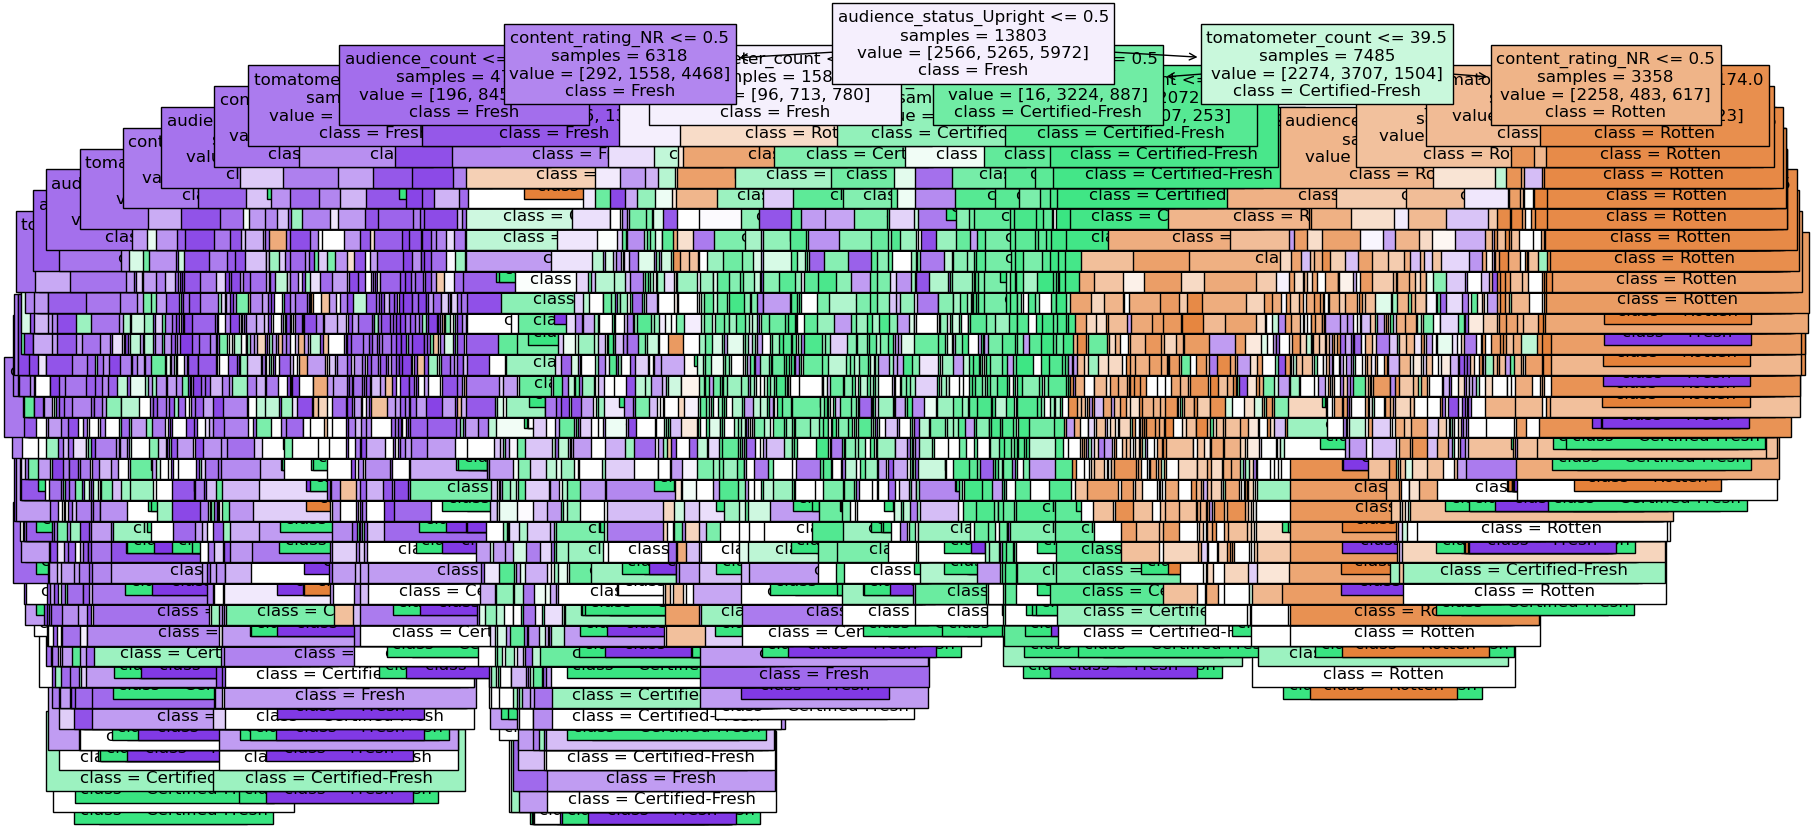

In [53]:
from sklearn import tree
fig = plt.figure(figsize = (20,10))

tree.plot_tree(dt_clf, feature_names=list(X.columns), class_names=list(y.unique()), fontsize=12,filled=True, 
               impurity=False)

In [54]:
data.shape

(17254, 5)

In [55]:
data.head()

content_rating tomatometer_status  tomatometer_count audience_status  \
0             PG             Rotten              149.0         Spilled   
1              R    Certified-Fresh              142.0         Upright   
2              R              Fresh               24.0         Spilled   
3             NR    Certified-Fresh               54.0         Upright   
4              G              Fresh               27.0         Upright   

   audience_count  
0        254421.0  
1         11574.0  
2         14684.0  
3        105386.0  
4         68918.0

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17254 entries, 0 to 17711
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   content_rating      17254 non-null  object 
 1   tomatometer_status  17254 non-null  object 
 2   tomatometer_count   17254 non-null  float64
 3   audience_status     17254 non-null  object 
 4   audience_count      17254 non-null  float64
dtypes: float64(2), object(3)
memory usage: 808.8+ KB


In [57]:
data.isnull().sum()

content_rating        0
tomatometer_status    0
tomatometer_count     0
audience_status       0
audience_count        0
dtype: int64

In [58]:
data.describe()

tomatometer_count  audience_count
count       17254.000000    1.725400e+04
mean           56.666048    1.452080e+05
std            66.616075    1.771737e+06
min             5.000000    5.000000e+00
25%            12.000000    7.152500e+02
50%            28.000000    4.308500e+03
75%            75.000000    2.534625e+04
max           535.000000    3.579764e+07

In [59]:
data['tomatometer_count'].unique()

array([149., 142.,  24.,  54.,  27.,  51.,  28.,  10.,  11.,  15.,  22.,
        83.,  18., 124.,   5.,  52.,  48.,  12.,   8.,   6., 121.,  16.,
       131.,  92.,  34., 156.,  13.,  30.,  69.,  75., 143.,  21.,  29.,
         7.,  76.,  14.,  77.,  38.,  59.,  41.,  50.,  42.,  32.,  36.,
         9., 126.,  40.,  63., 125.,  82., 183.,  89.,  20.,  26., 201.,
        55.,  99.,  80.,  33., 154., 116.,  46.,  47.,  95., 133., 164.,
        71., 120., 118.,  19., 148., 105.,  49.,  25., 123., 190.,  37.,
        35., 155., 170.,  66., 213.,  31.,  43., 100.,  39.,  45., 137.,
       215., 127., 278.,  58., 110., 146.,  98.,  93.,  84., 132., 119.,
        17., 188., 239., 108., 162., 122.,  60.,  64., 115.,  53., 243.,
       163., 167., 151.,  97., 206., 152., 174., 224., 202.,  23.,  65.,
        56.,  44.,  67.,  57.,  61.,  72.,  62.,  70.,  74.,  68.,  78.,
        90., 106.,  96., 104., 102.,  87., 101., 113.,  73.,  79.,  86.,
       165., 138., 135.,  81.,  85., 309., 130.,  9

In [60]:
data['audience_count'].unique()

array([254421.,  11574.,  14684., ...,  11369., 101511.,  30193.])

In [61]:
len(data['tomatometer_count'].unique())

389

In [62]:
len(data['audience_count'].unique())

11009

In [63]:
from sklearn.ensemble import AdaBoostClassifier
naive_dt=DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=1.0,
    random_state=42)
ada_clf.fit(X_train, y_train)
print(ada_clf.score(X_test, y_test))

0.7241379310344828


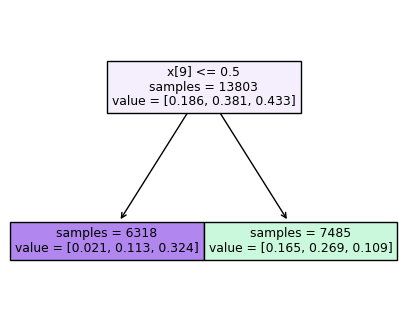

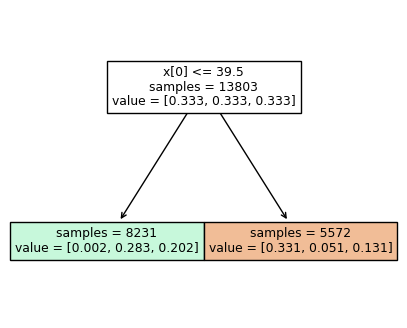

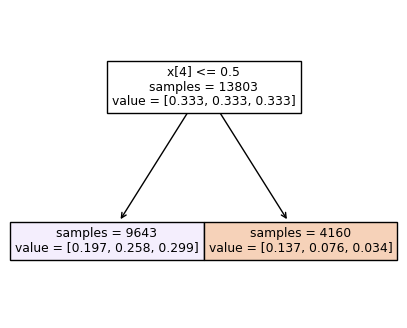

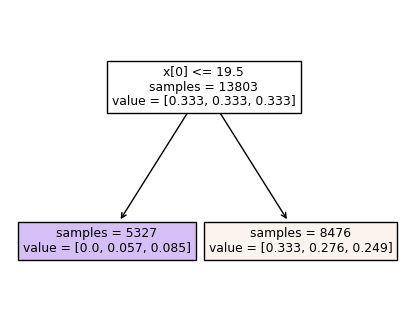

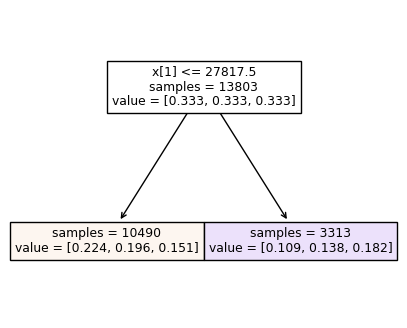

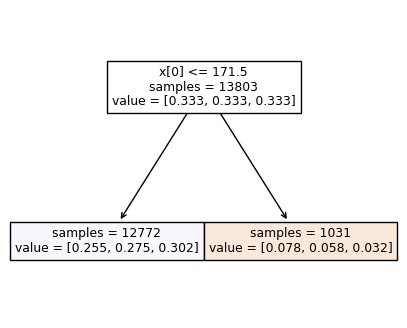

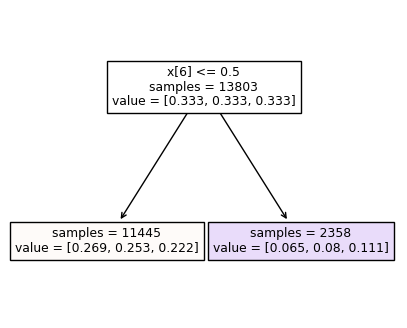

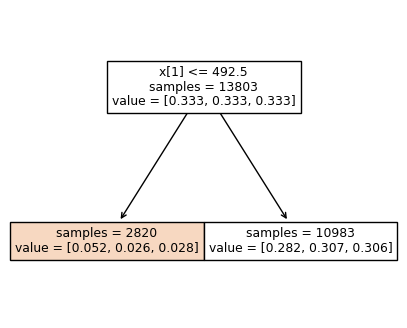

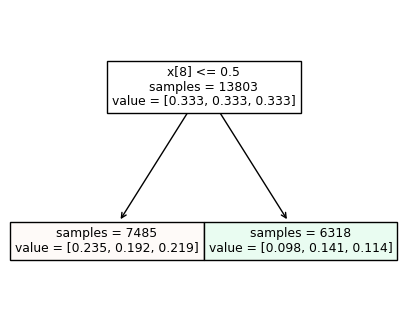

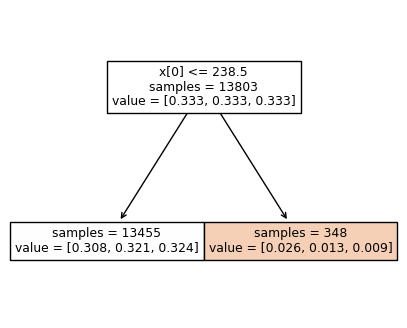

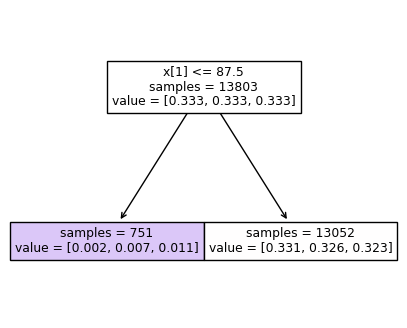

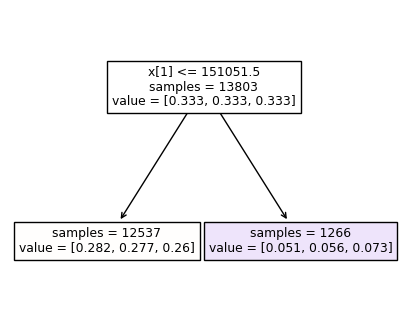

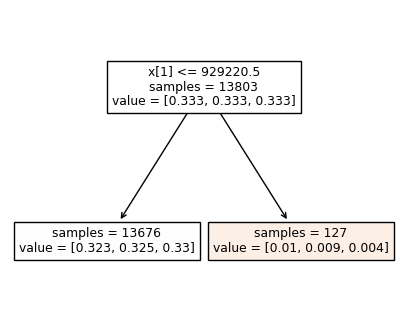

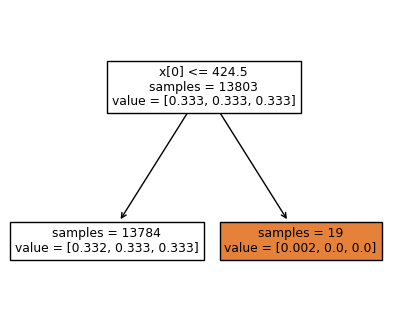

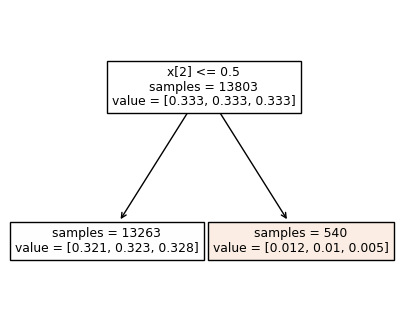

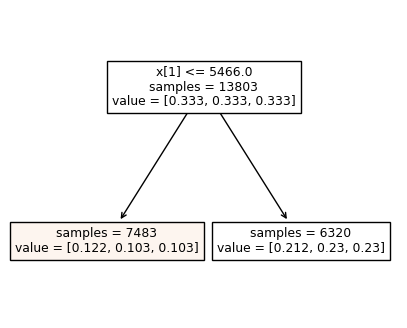

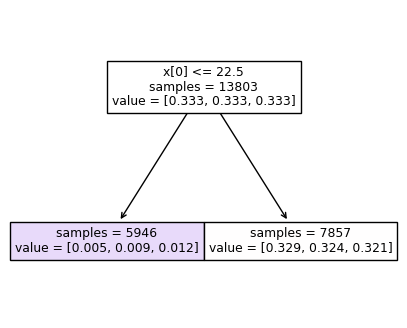

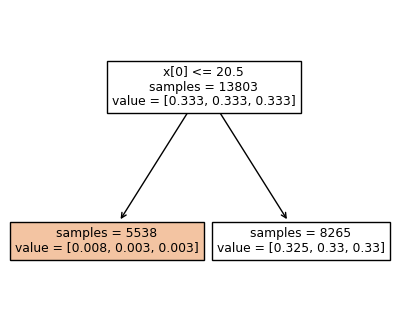

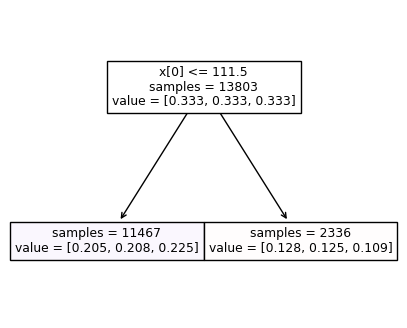

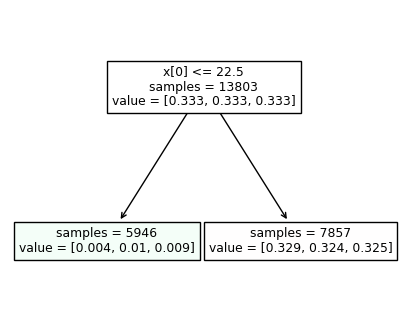

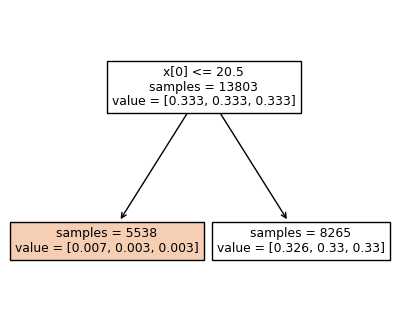

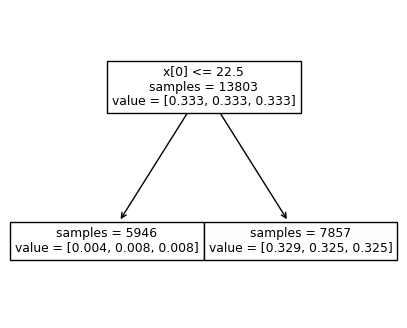

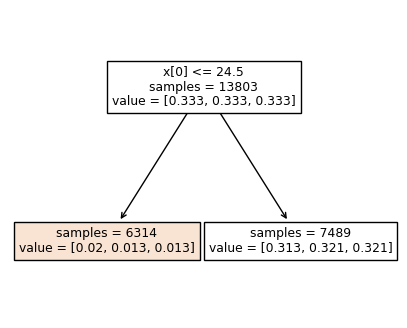

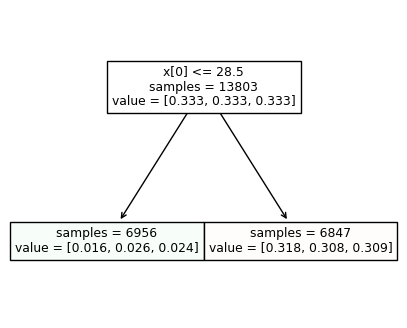

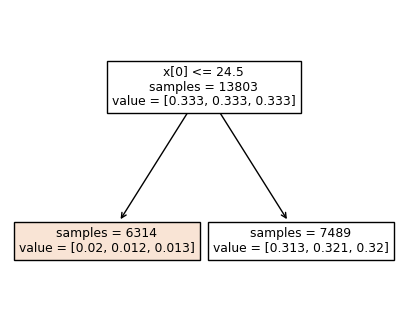

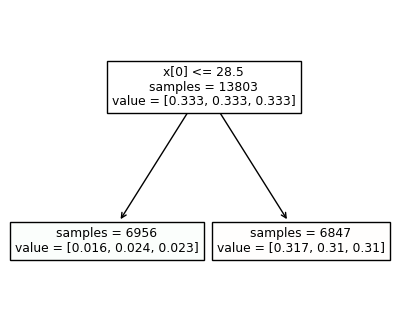

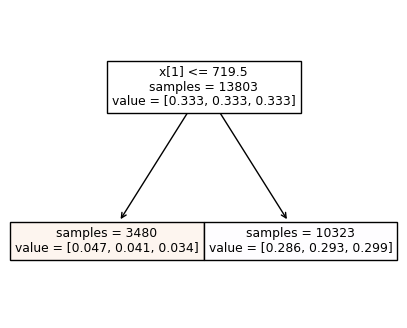

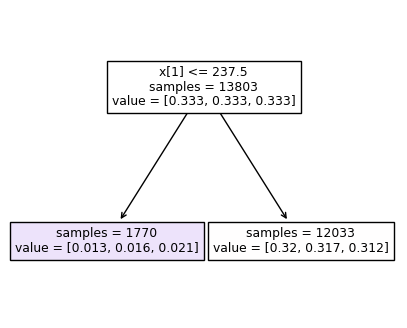

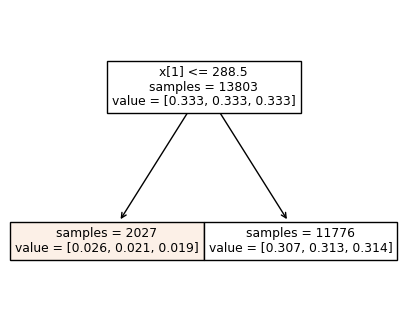

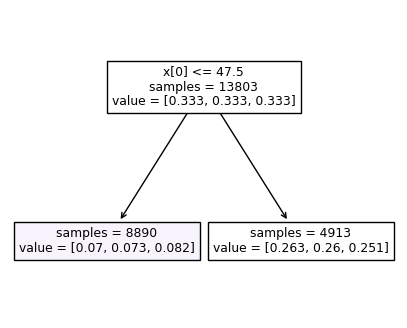

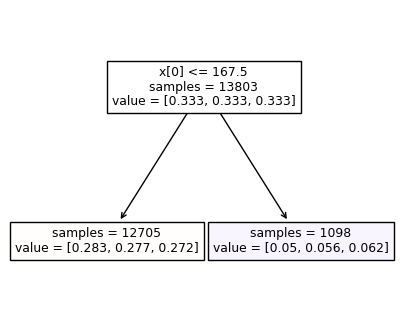

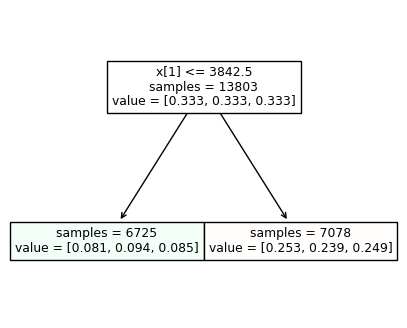

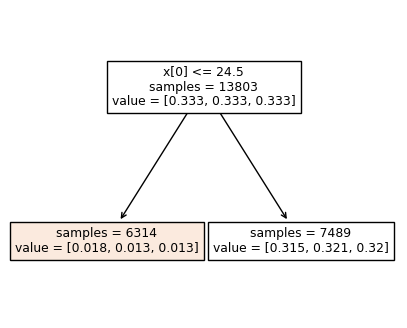

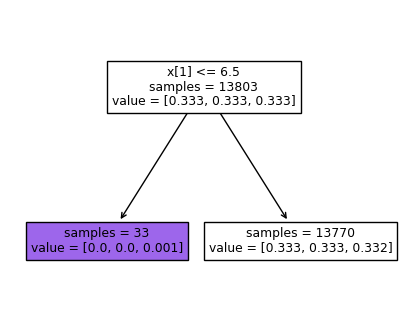

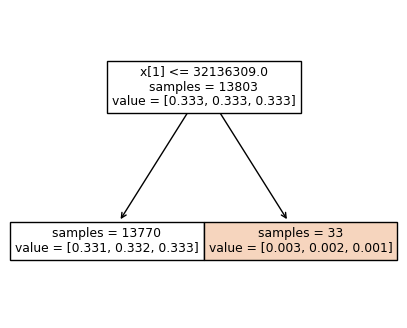

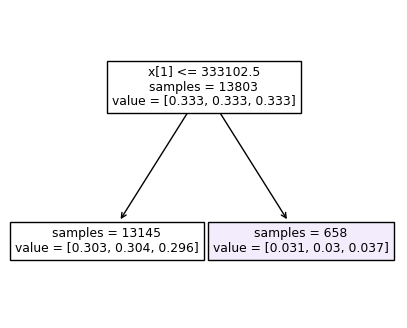

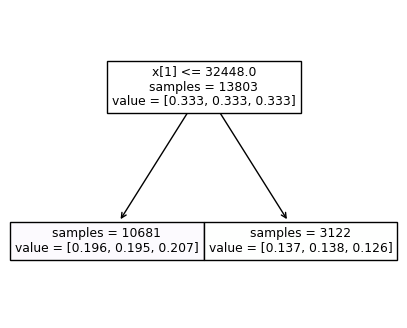

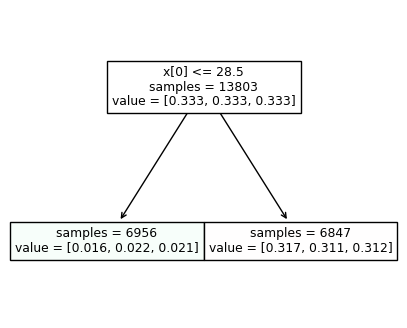

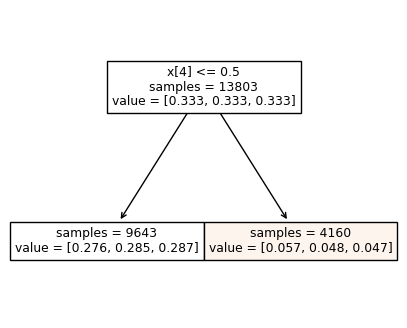

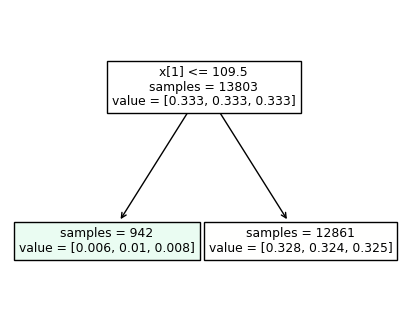

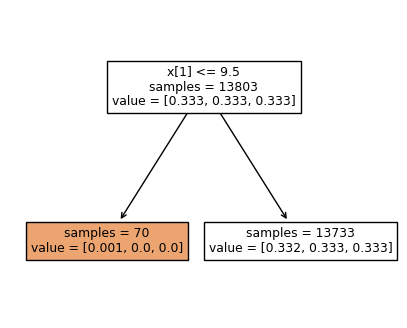

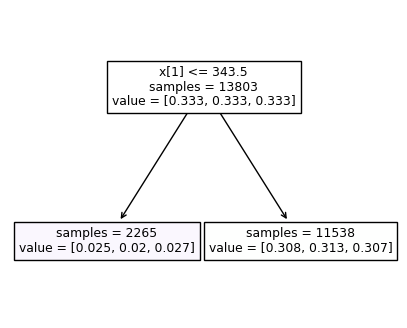

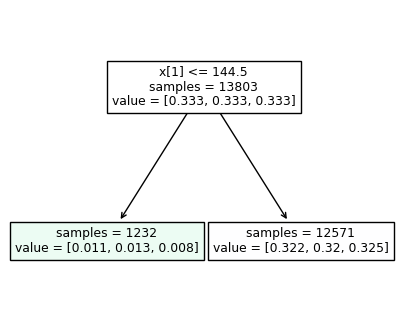

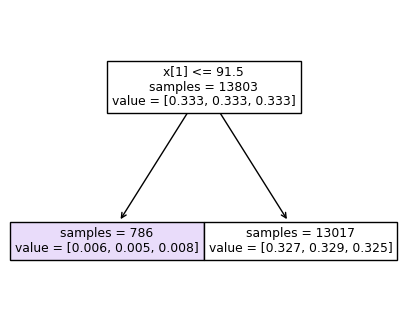

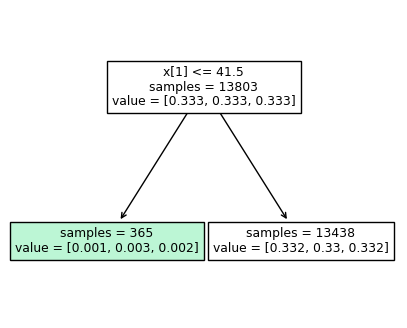

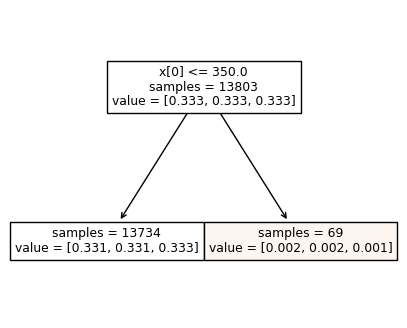

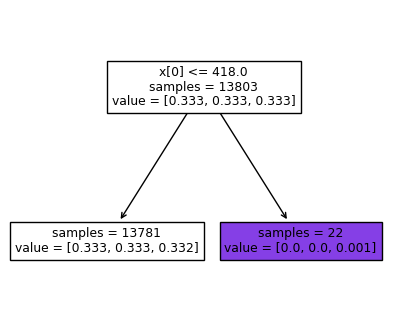

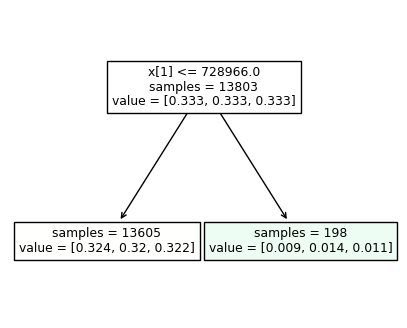

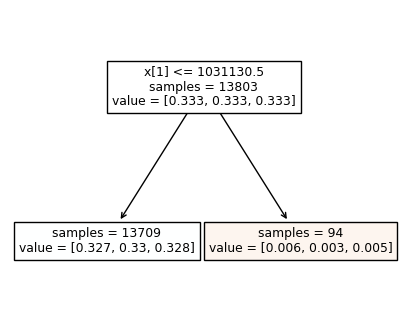

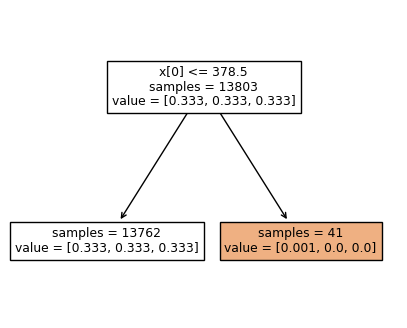

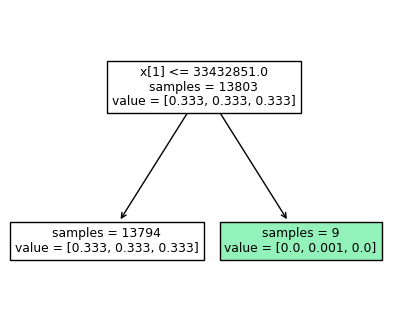

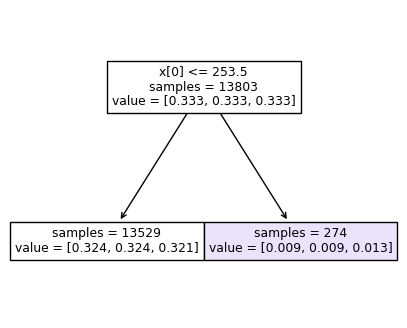

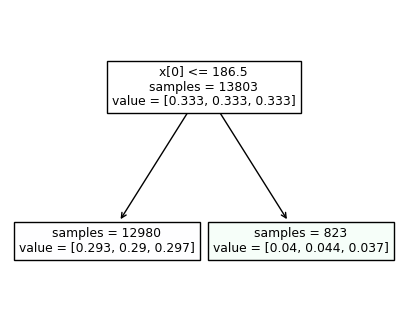

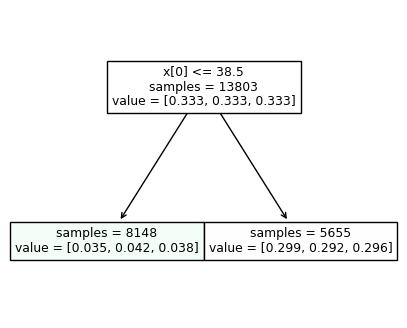

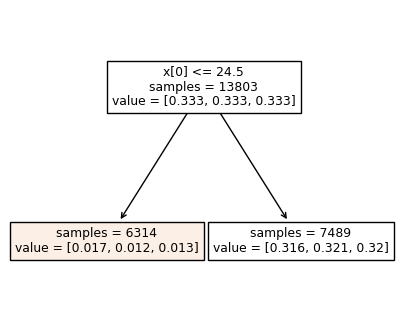

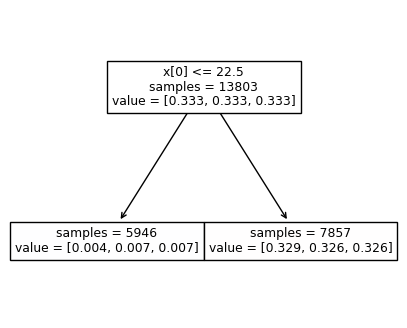

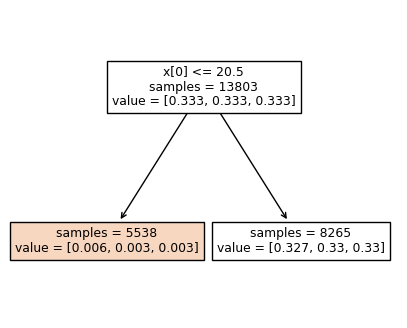

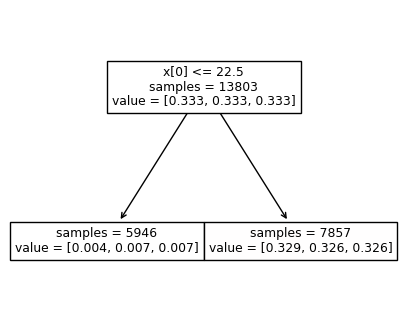

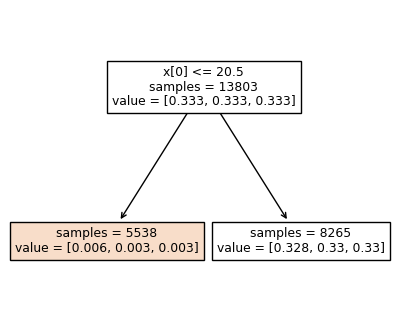

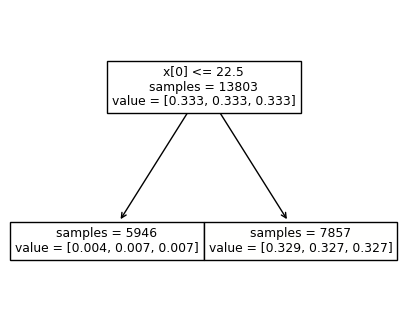

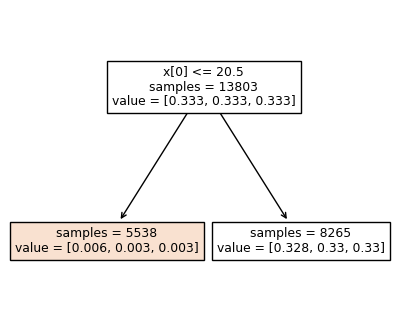

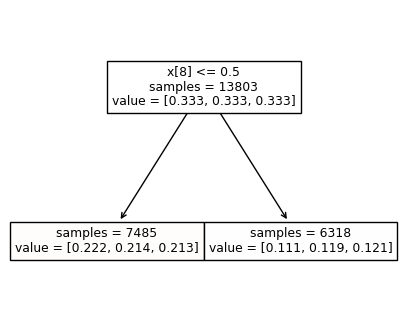

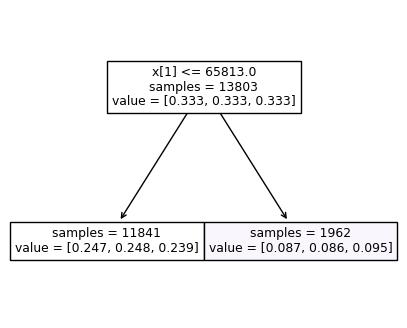

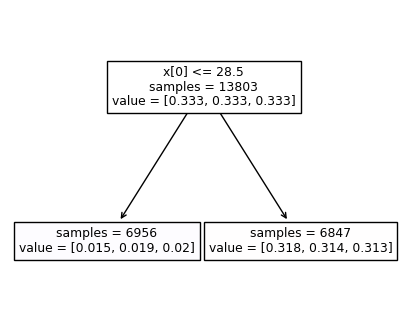

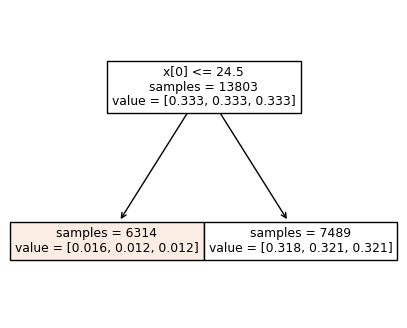

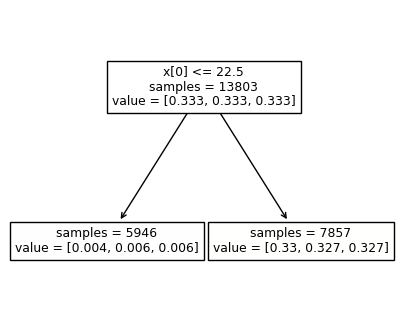

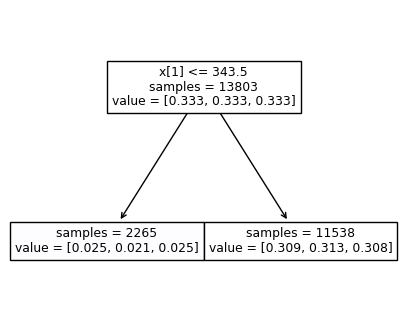

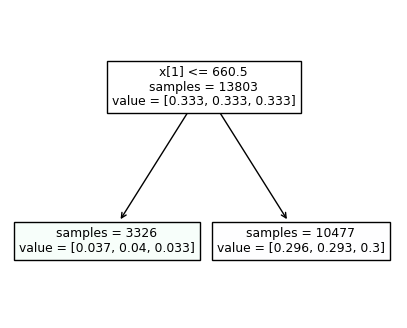

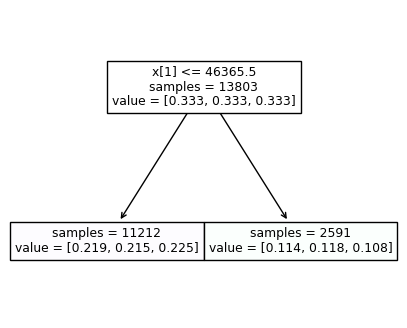

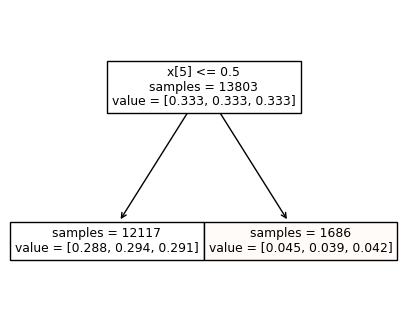

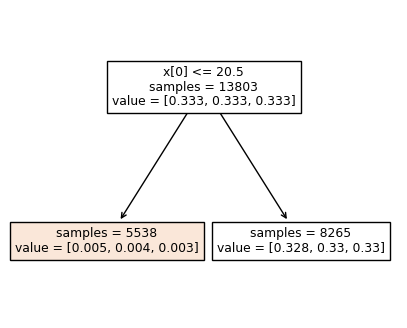

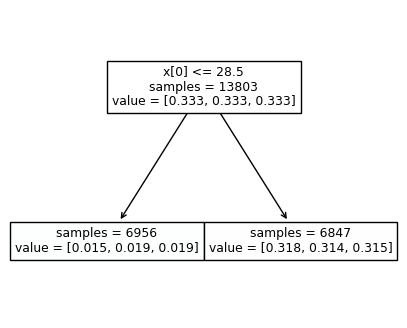

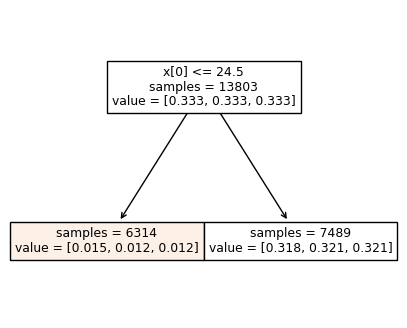

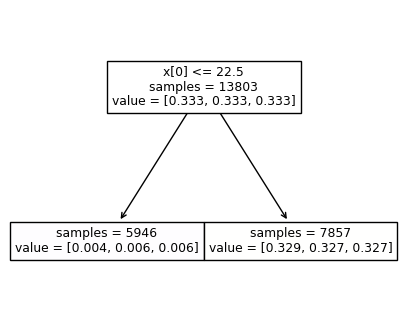

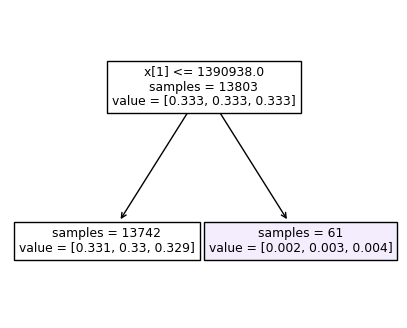

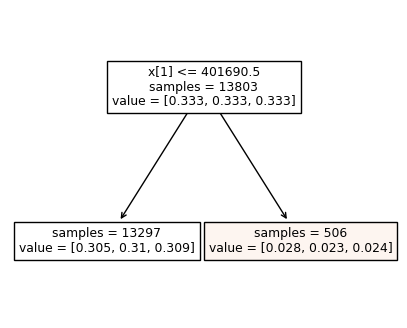

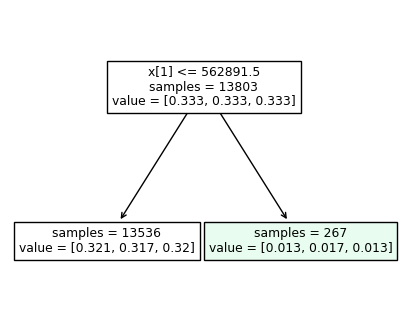

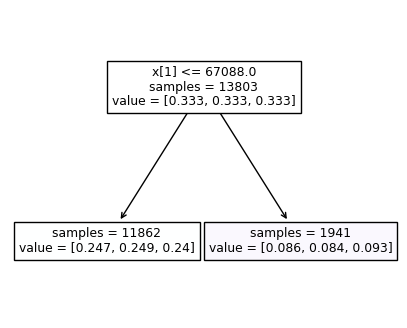

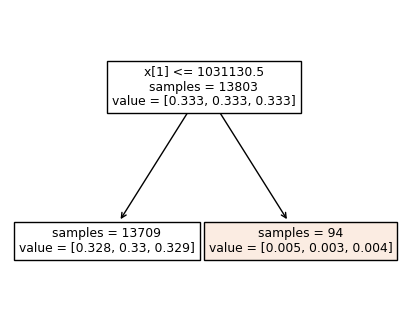

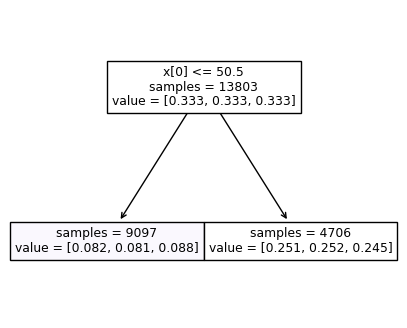

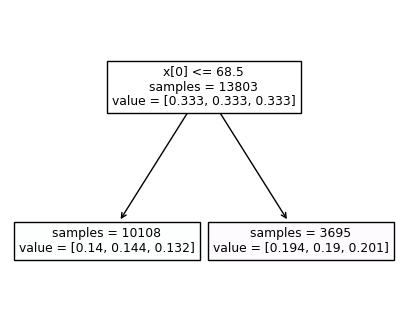

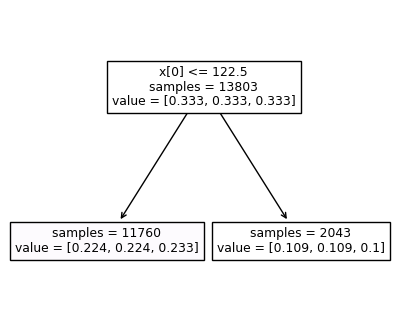

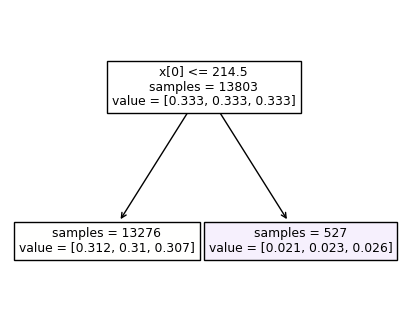

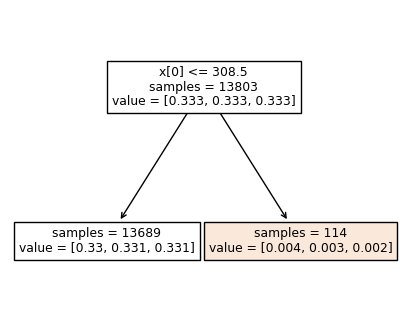

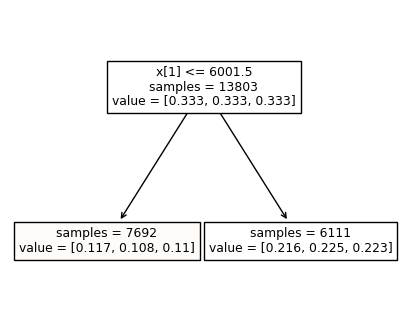

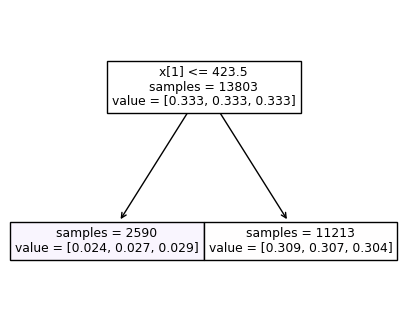

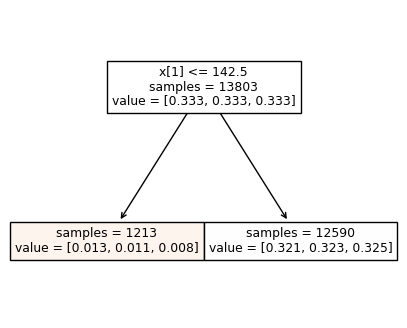

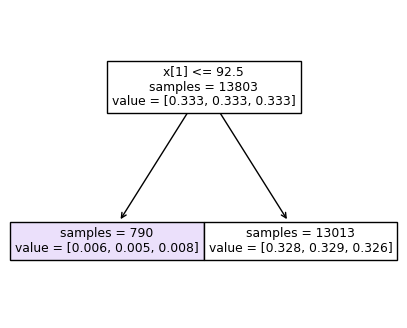

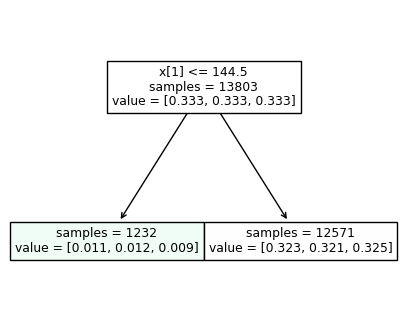

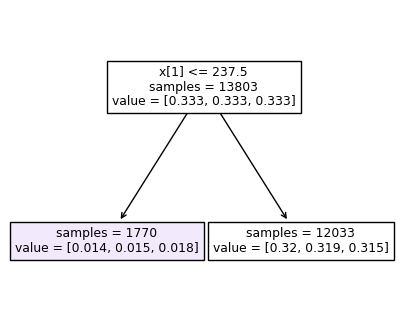

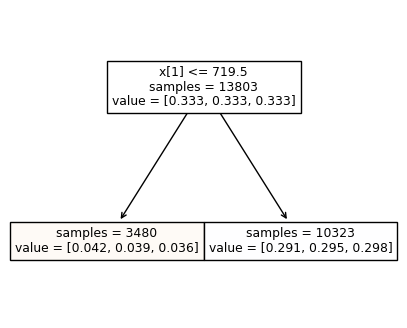

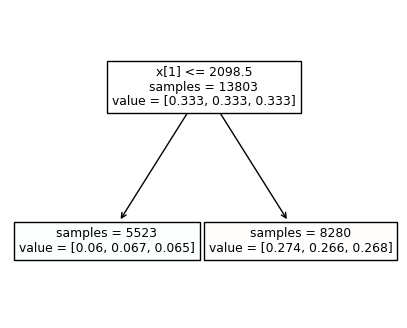

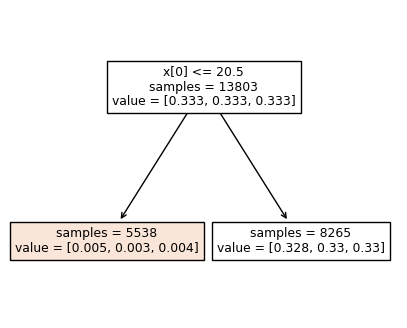

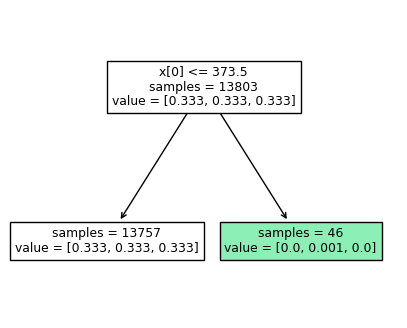

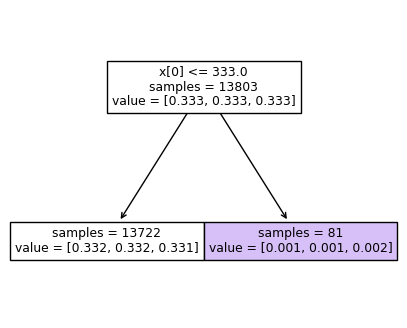

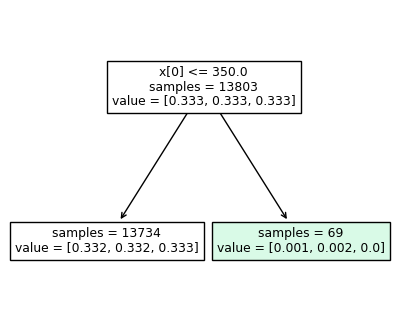

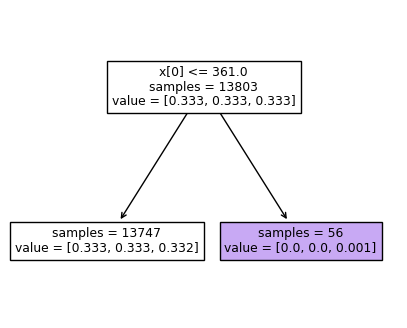

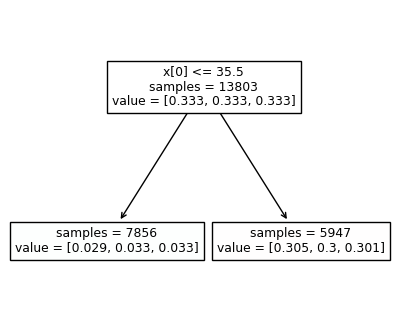

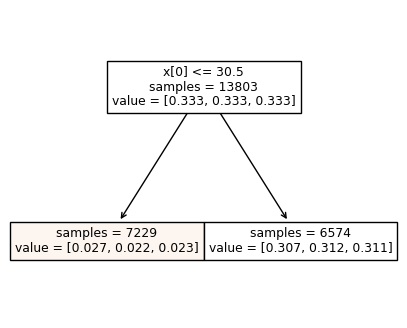

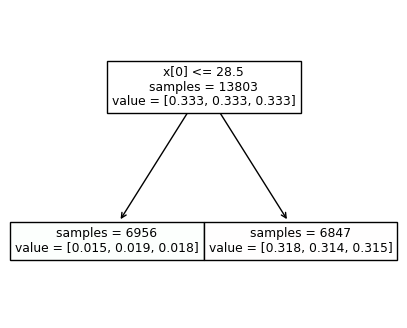

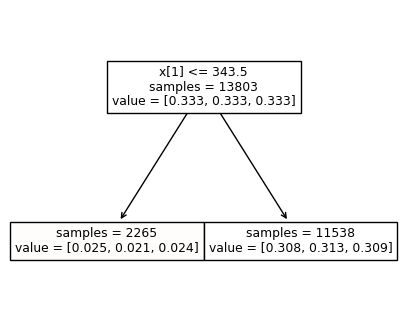

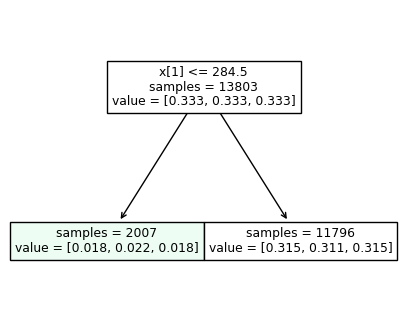

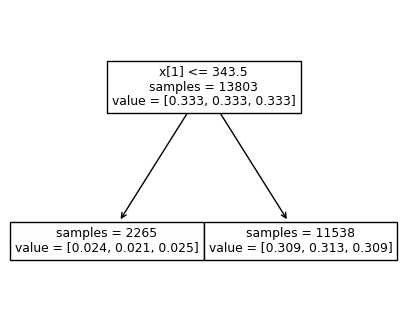

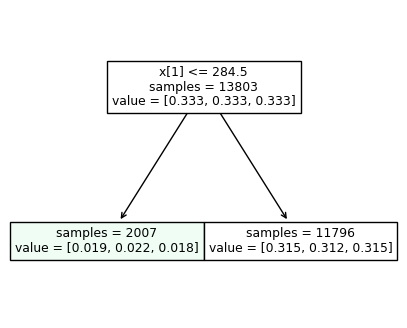

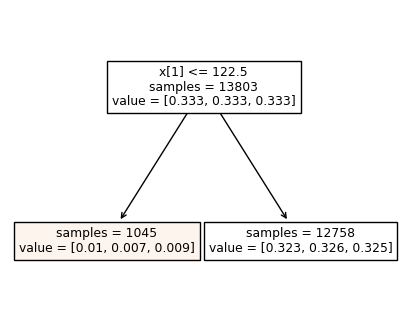

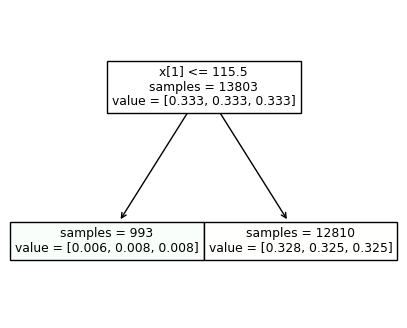

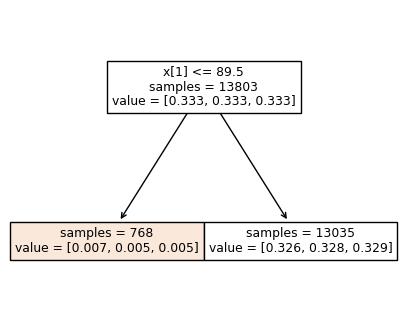

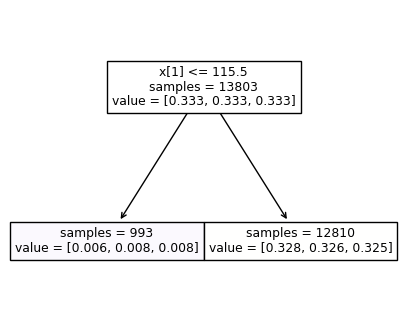

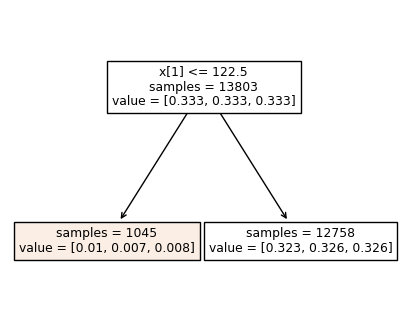

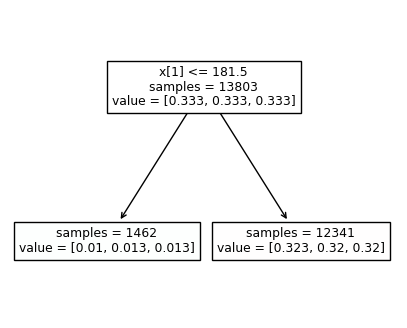

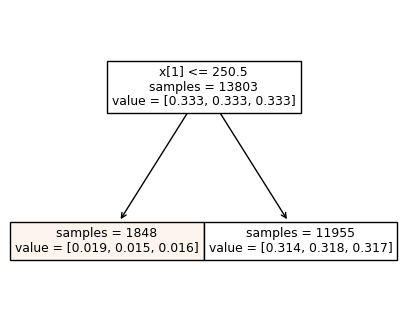

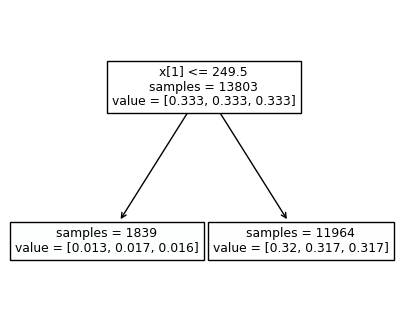

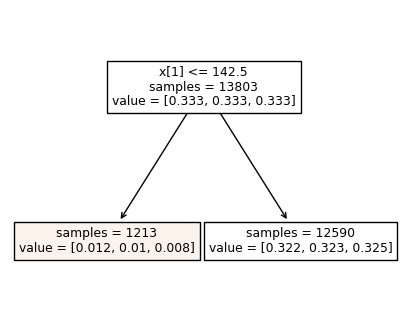

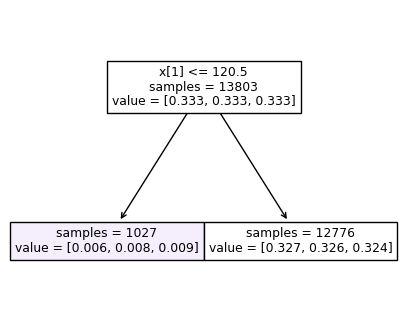

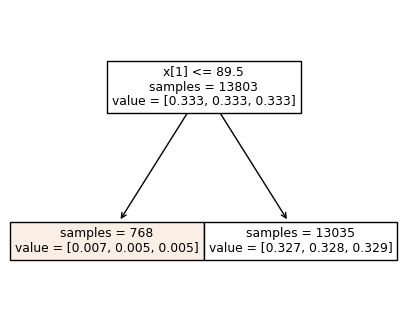

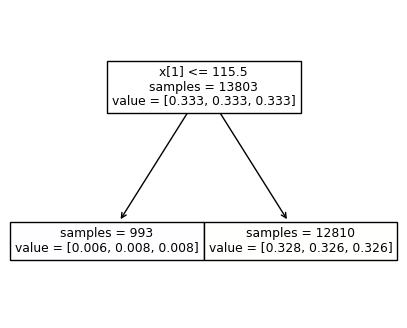

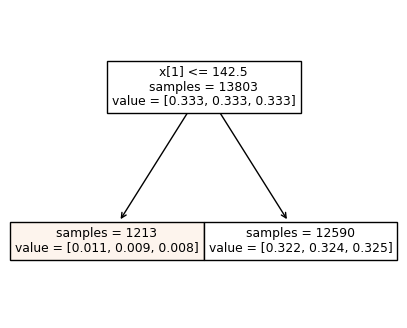

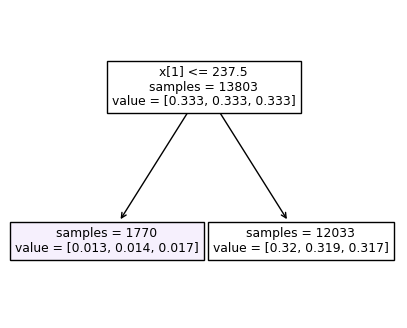

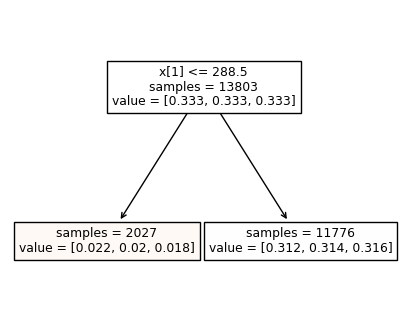

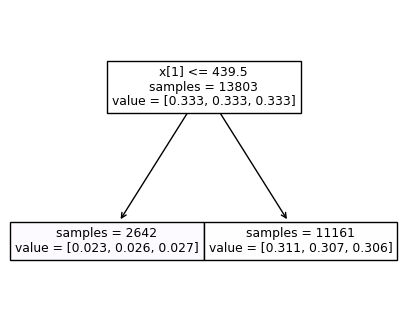

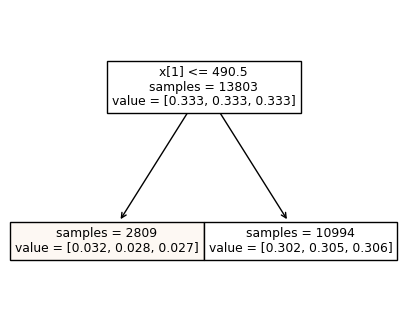

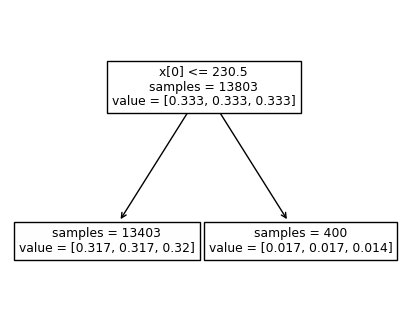

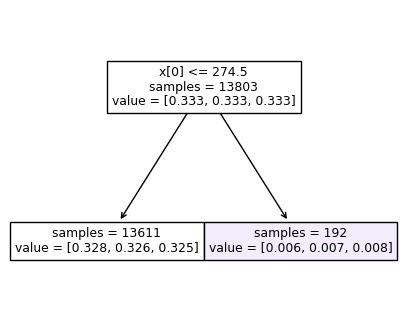

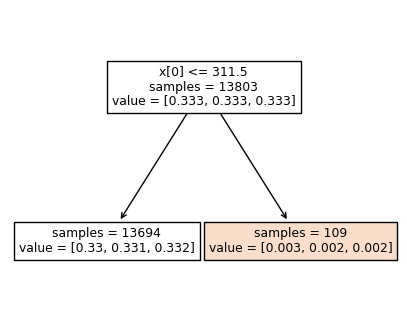

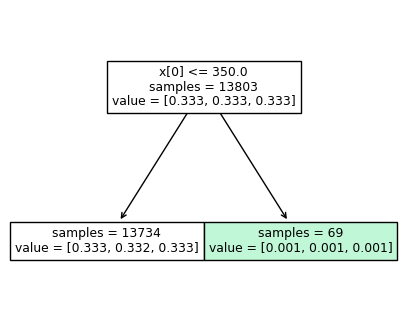

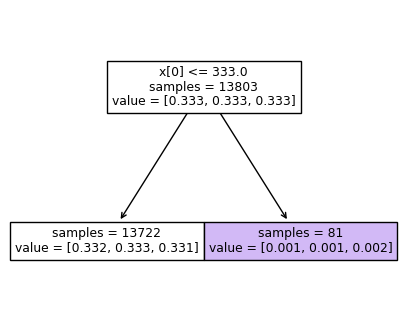

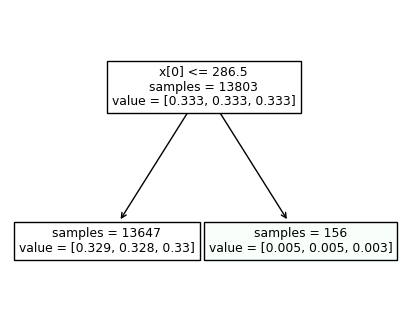

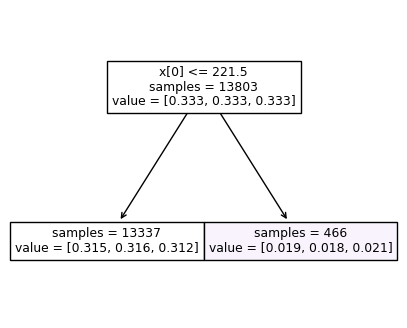

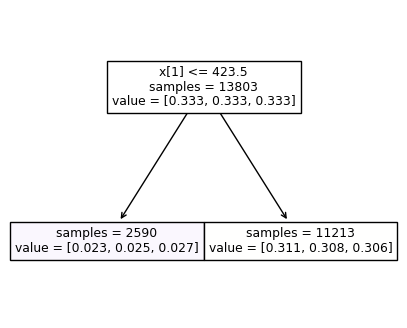

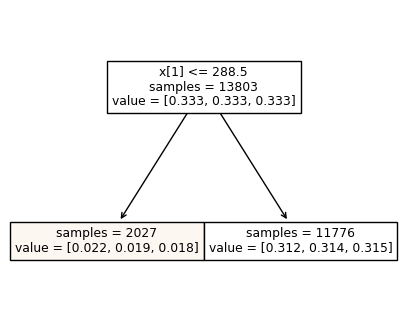

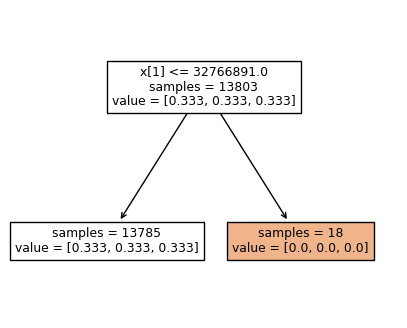

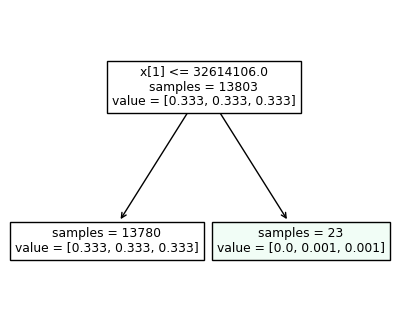

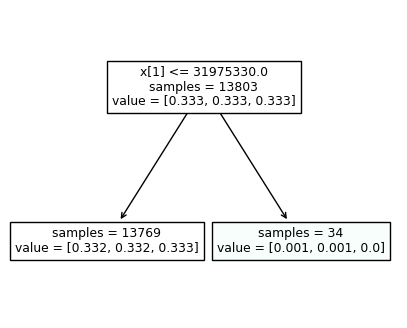

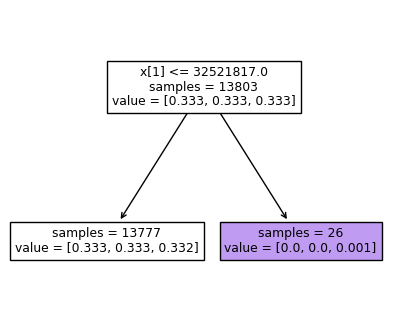

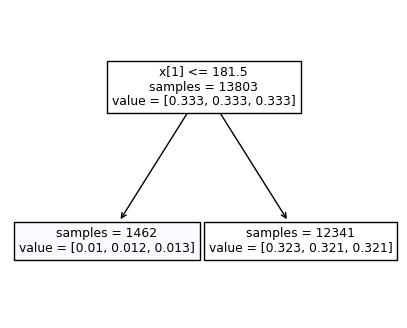

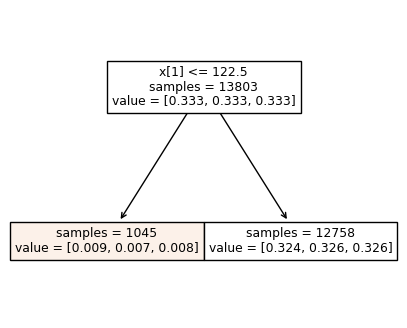

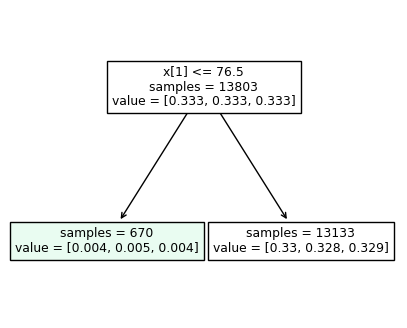

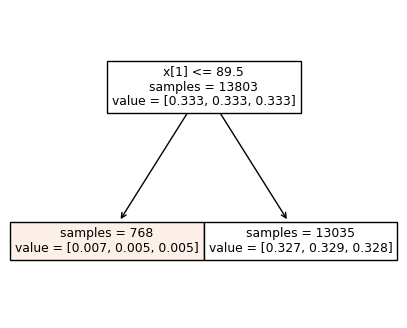

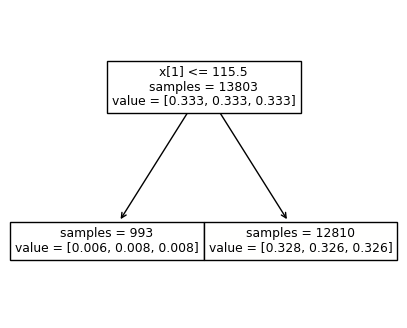

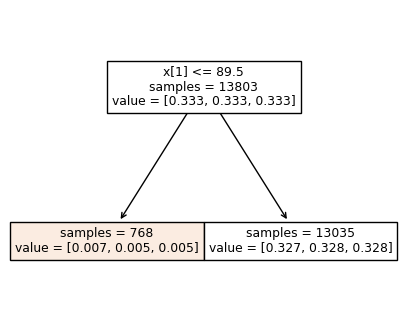

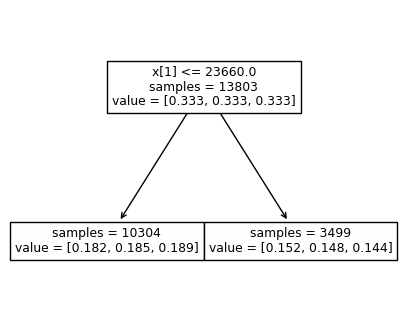

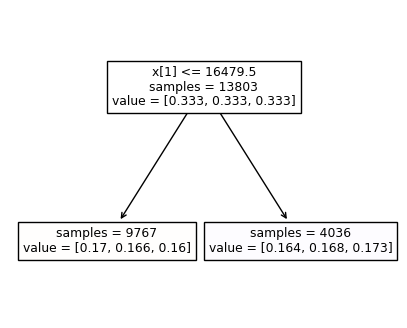

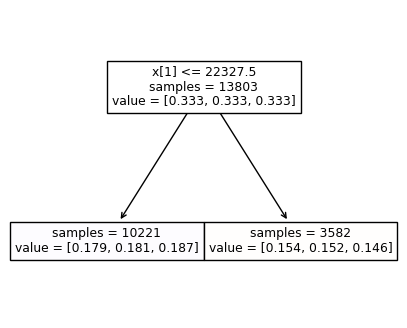

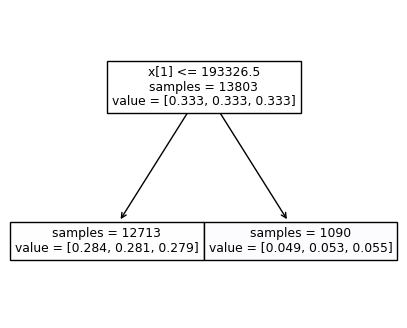

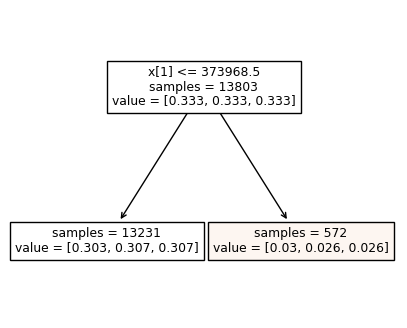

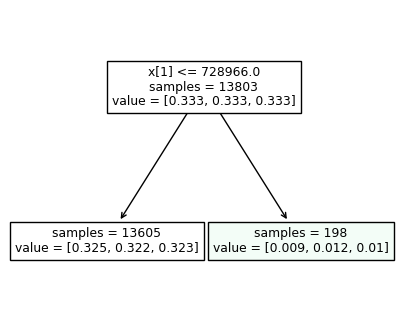

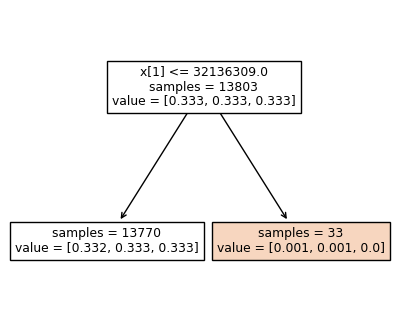

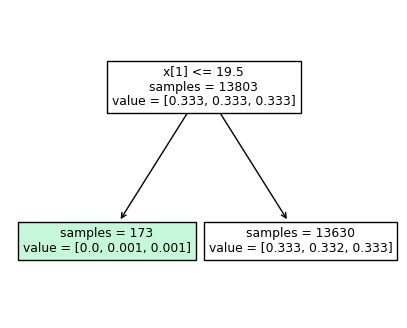

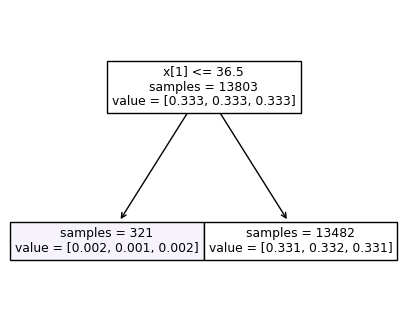

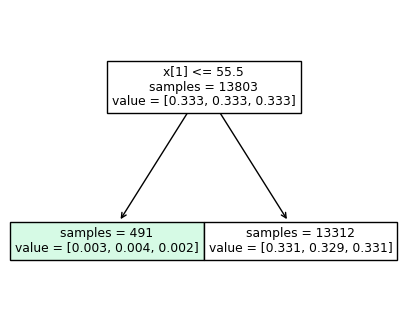

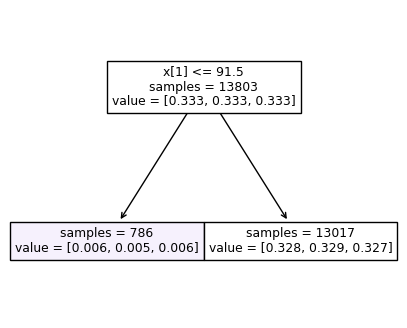

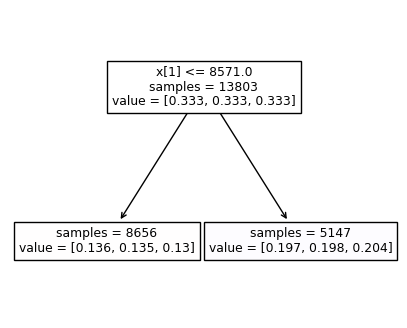

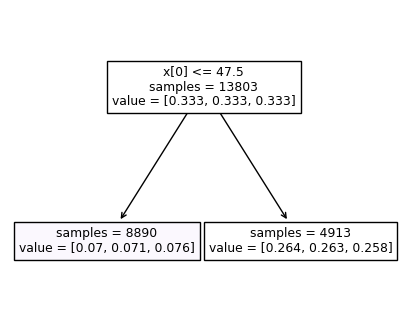

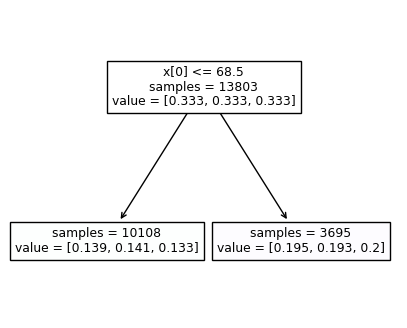

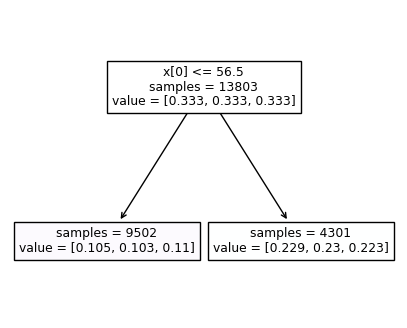

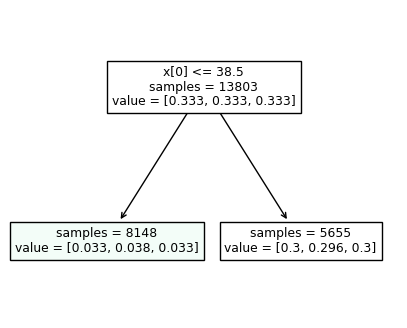

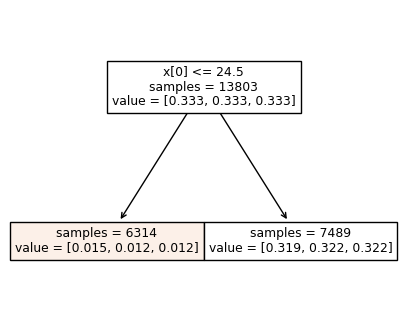

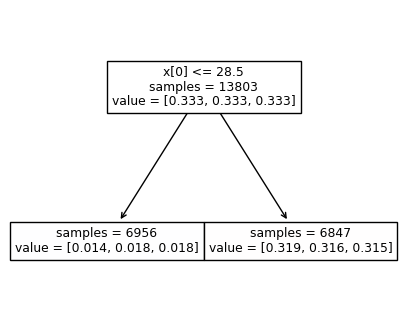

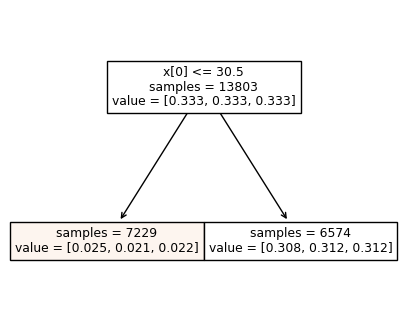

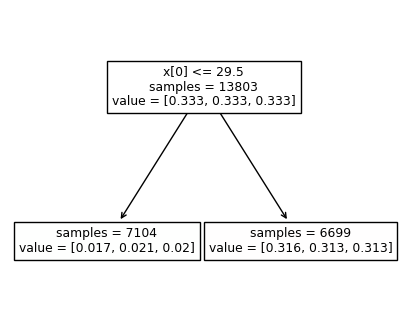

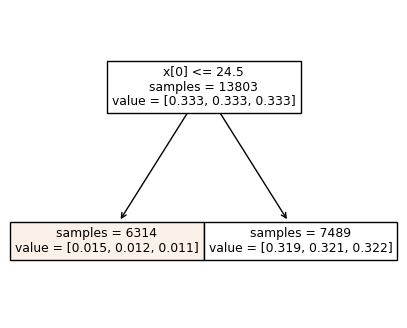

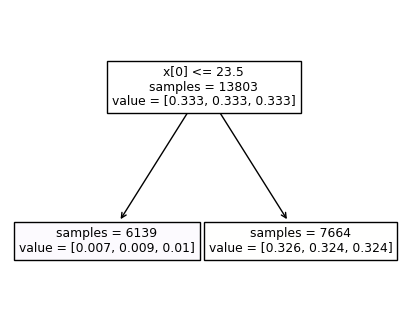

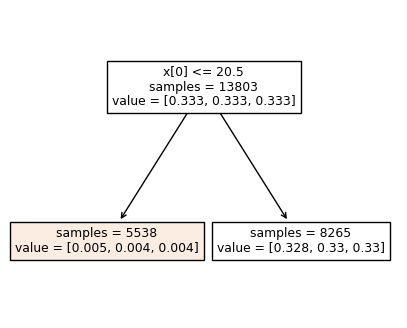

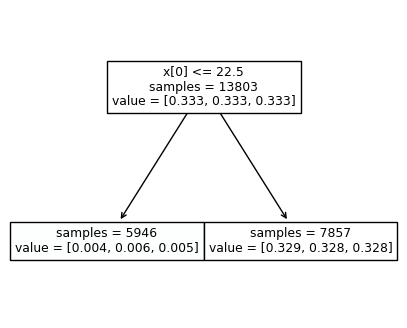

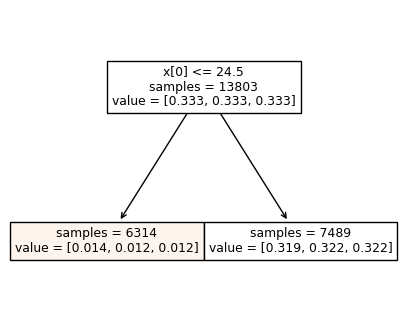

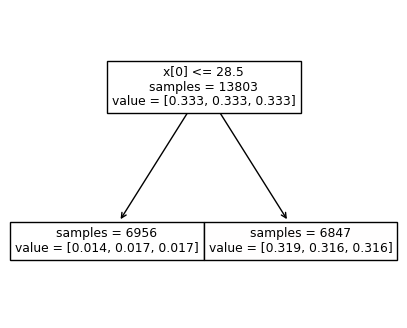

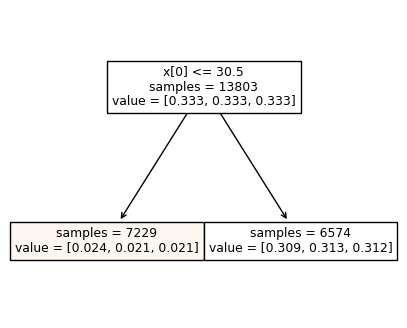

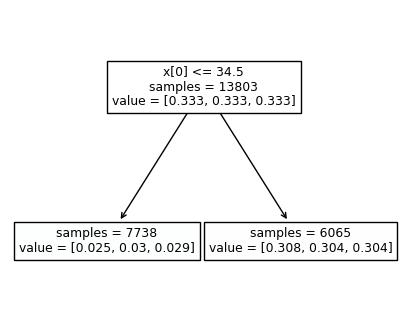

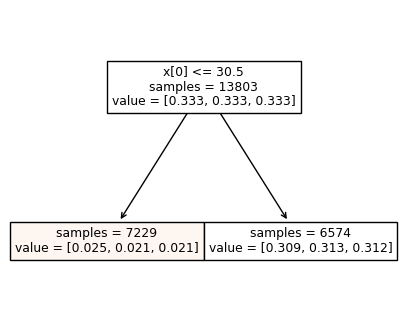

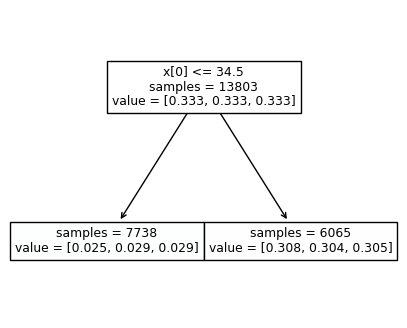

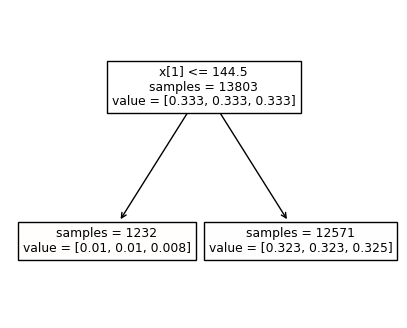

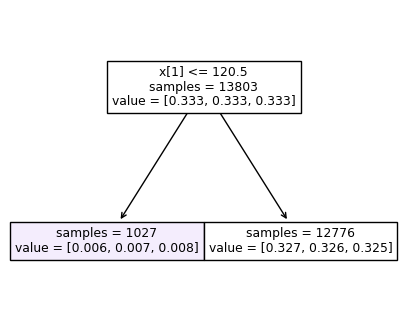

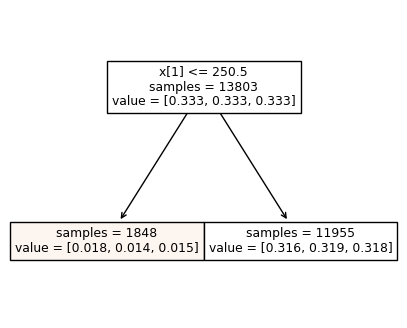

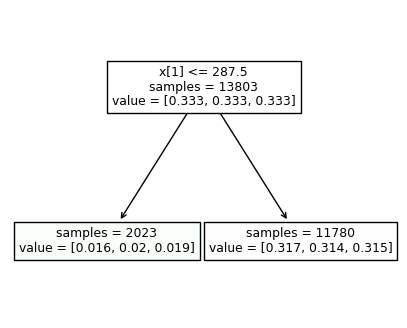

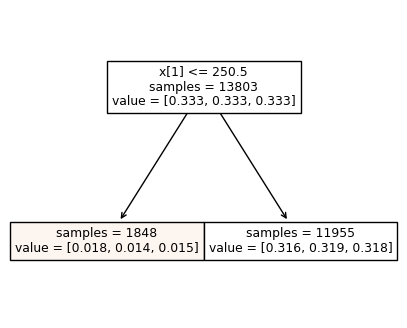

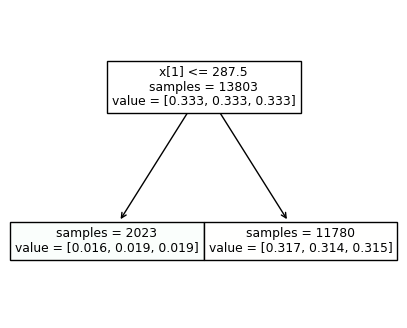

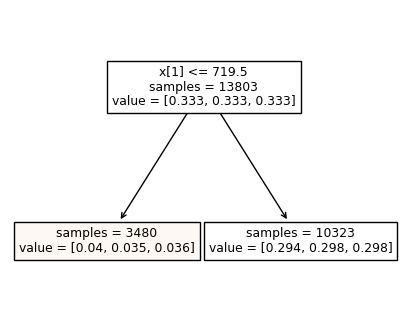

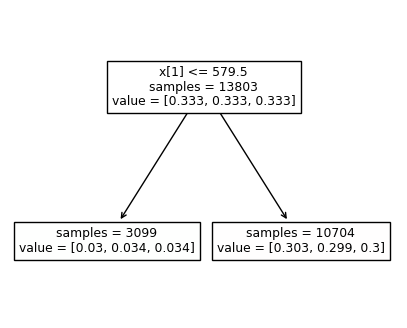

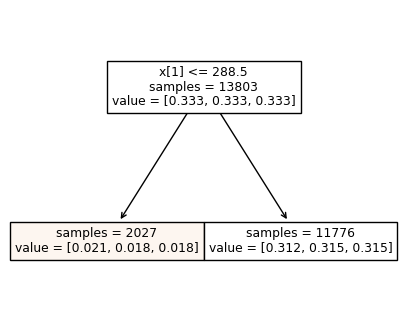

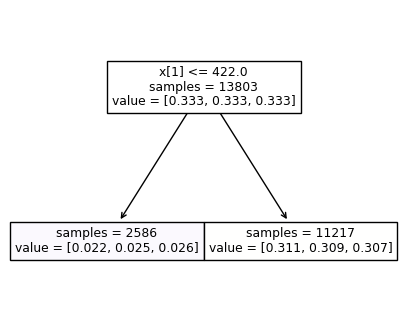

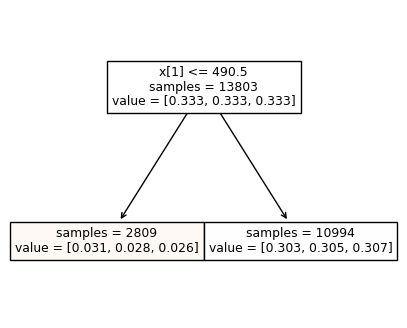

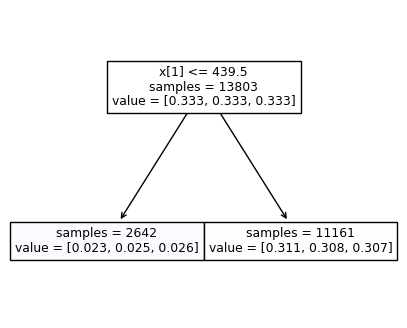

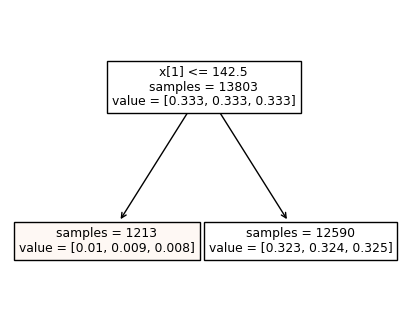

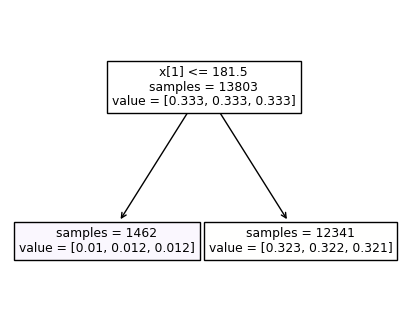

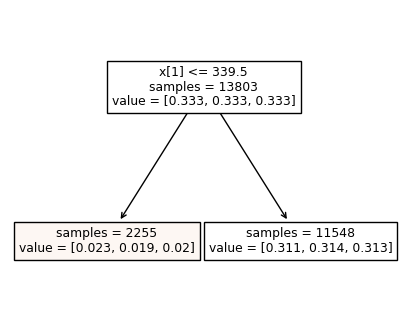

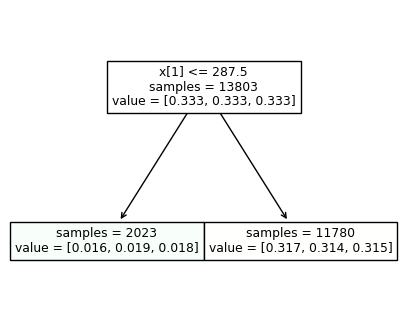

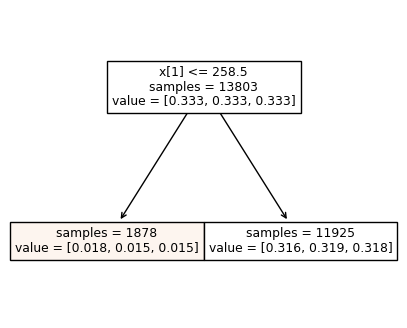

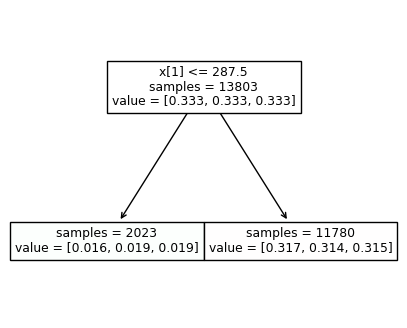

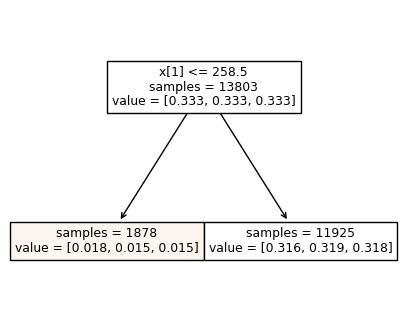

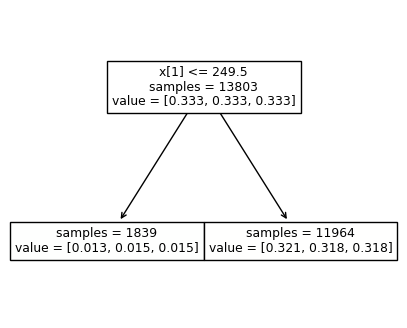

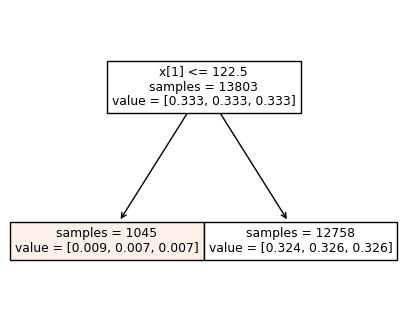

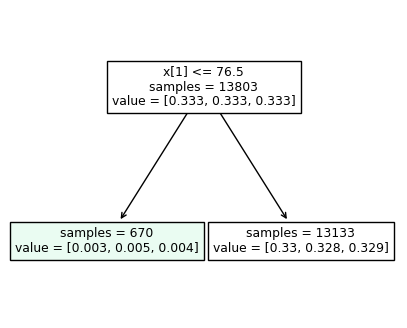

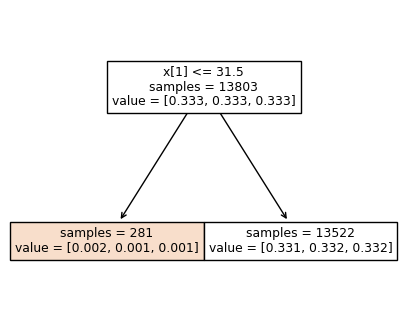

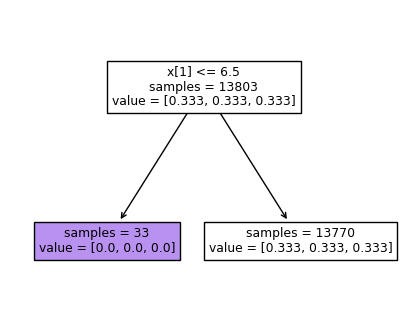

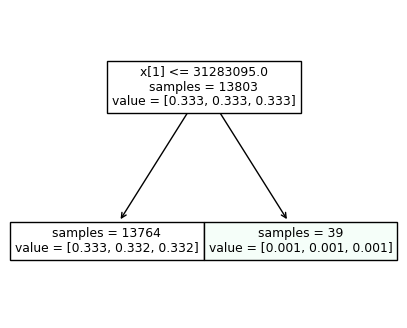

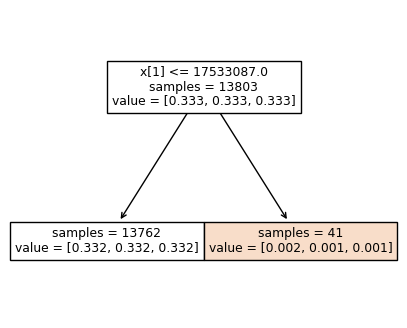

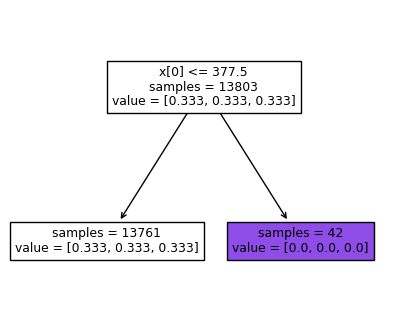

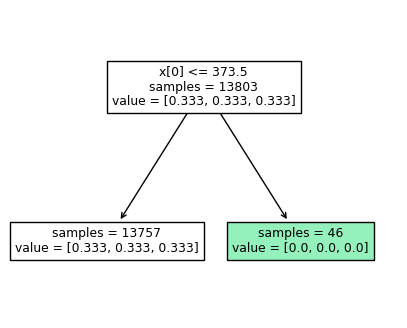

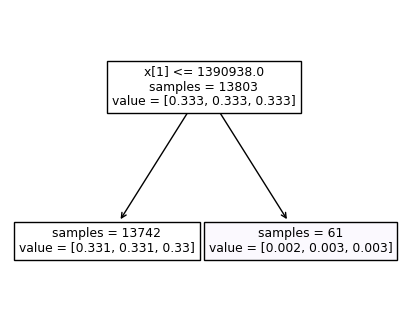

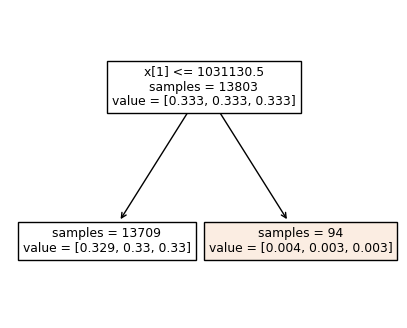

In [64]:
from sklearn import tree
for dt_tree in ada_clf.estimators_:
    fig=plt.figure(figsize=(5, 4))
    tree.plot_tree(dt_tree, filled=True, impurity=False)
    plt.show()

In [65]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['tomatometer_status'],
                                                    data['audience_status'], test_size = 0.25, 
                                                    random_state=0)

In [66]:
X_train

15836    Certified-Fresh
15994             Rotten
3185     Certified-Fresh
12943              Fresh
240                Fresh
              ...       
9426     Certified-Fresh
13434    Certified-Fresh
10064              Fresh
11043             Rotten
2769              Rotten
Name: tomatometer_status, Length: 12940, dtype: object

In [67]:
y_train

15836    Spilled
15994    Spilled
3185     Upright
12943    Upright
240      Spilled
          ...   
9426     Upright
13434    Upright
10064    Upright
11043    Upright
2769     Spilled
Name: audience_status, Length: 12940, dtype: object